# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Importing important libraries

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [4]:
# importing required libraries
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Modeling Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#traning and scoring libarries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [6]:
# Plotting libarries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots

In [7]:
# Performance meauring libarry
import time

### Loading the data form the csv kept in data folder, using different seperator ';' to separate columns as it has been used in the provided dataset.

In [10]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [11]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Looking at the data through different ways to undertand it better

In [12]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [13]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [15]:
df.shape

(41188, 21)

In [16]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### We dont have any null data to drop from the dataframe

#### Seperating numeric and non numeric column list for further use

In [17]:
cat_list=[]
num_list=[]

for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    if unique_values<13:
        cat_list.append(column_name)
    else:
        num_list.append(column_name)

In [18]:
cat_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'previous',
 'poutcome',
 'emp.var.rate',
 'nr.employed',
 'y']

In [19]:
num_list

['age',
 'duration',
 'campaign',
 'pdays',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m']

### Data Preprocessing

#### Checking for outliers by plotting data

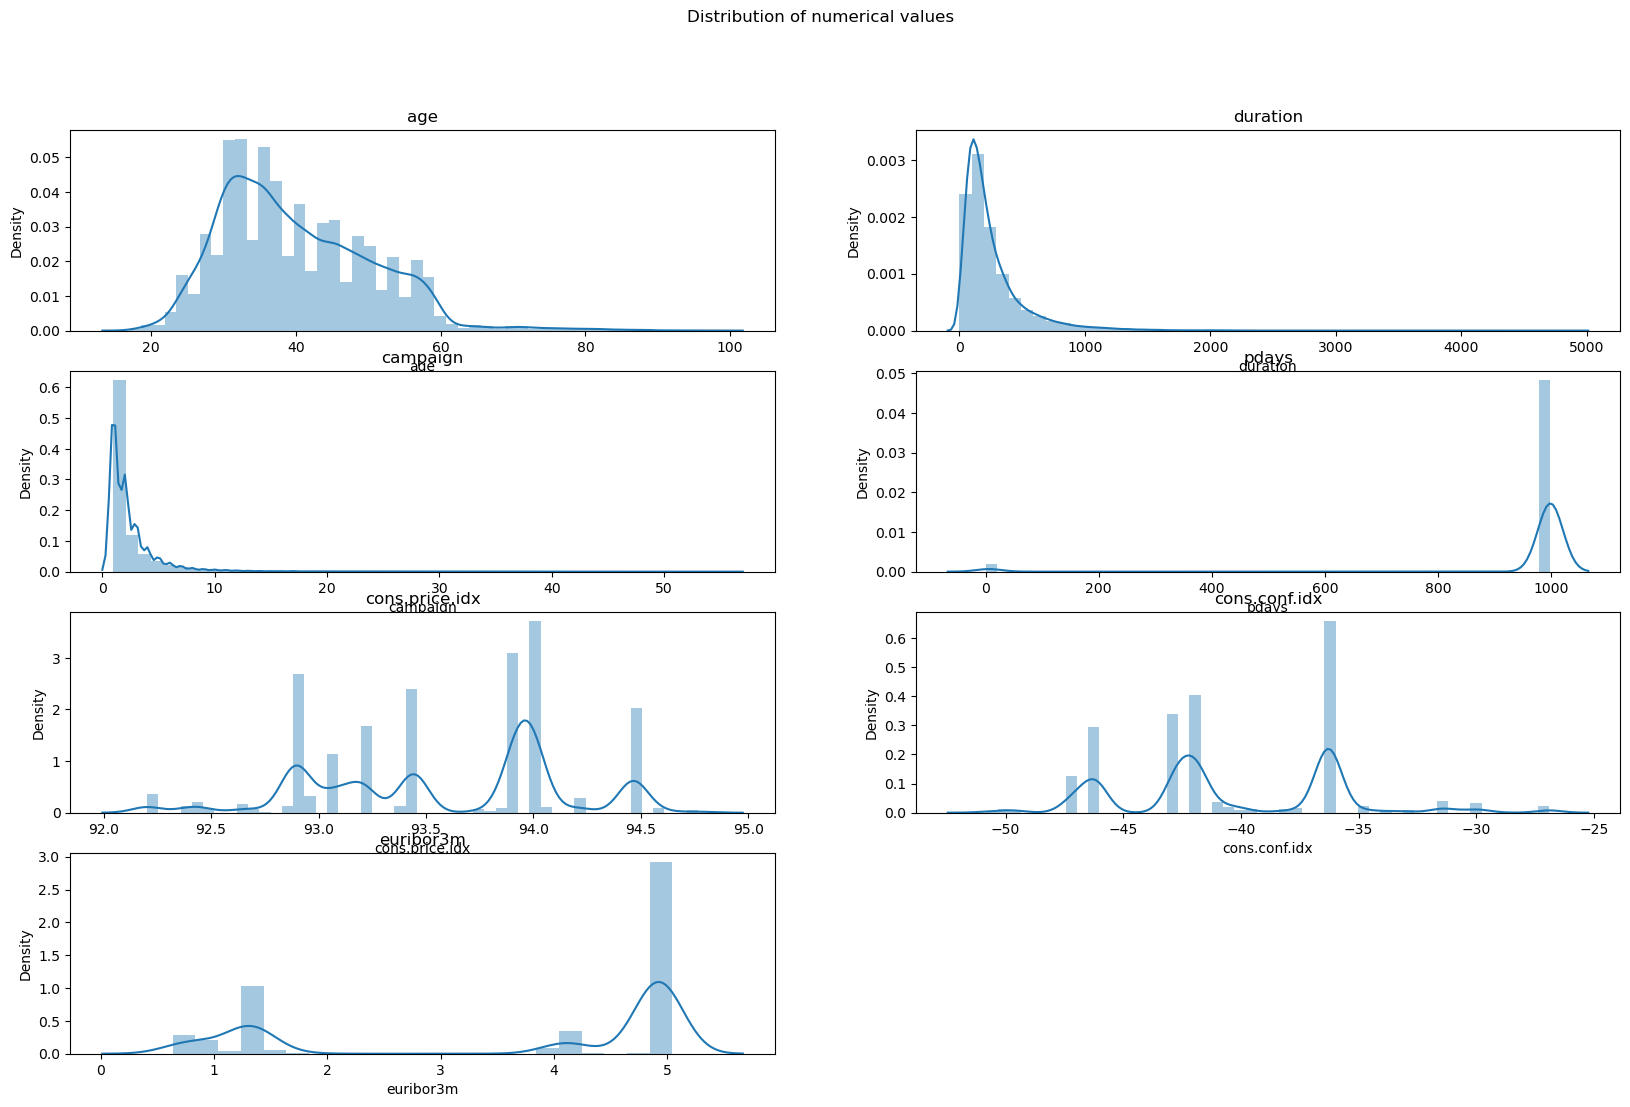

In [21]:
k=1
plt.figure(figsize=(20,12))
plt.suptitle("Distribution of numerical values")

for i in df.loc[:,num_list]:
    plt.subplot(4,2,k)
    sns.distplot(df[i])
    plt.title(i)
    k+=1

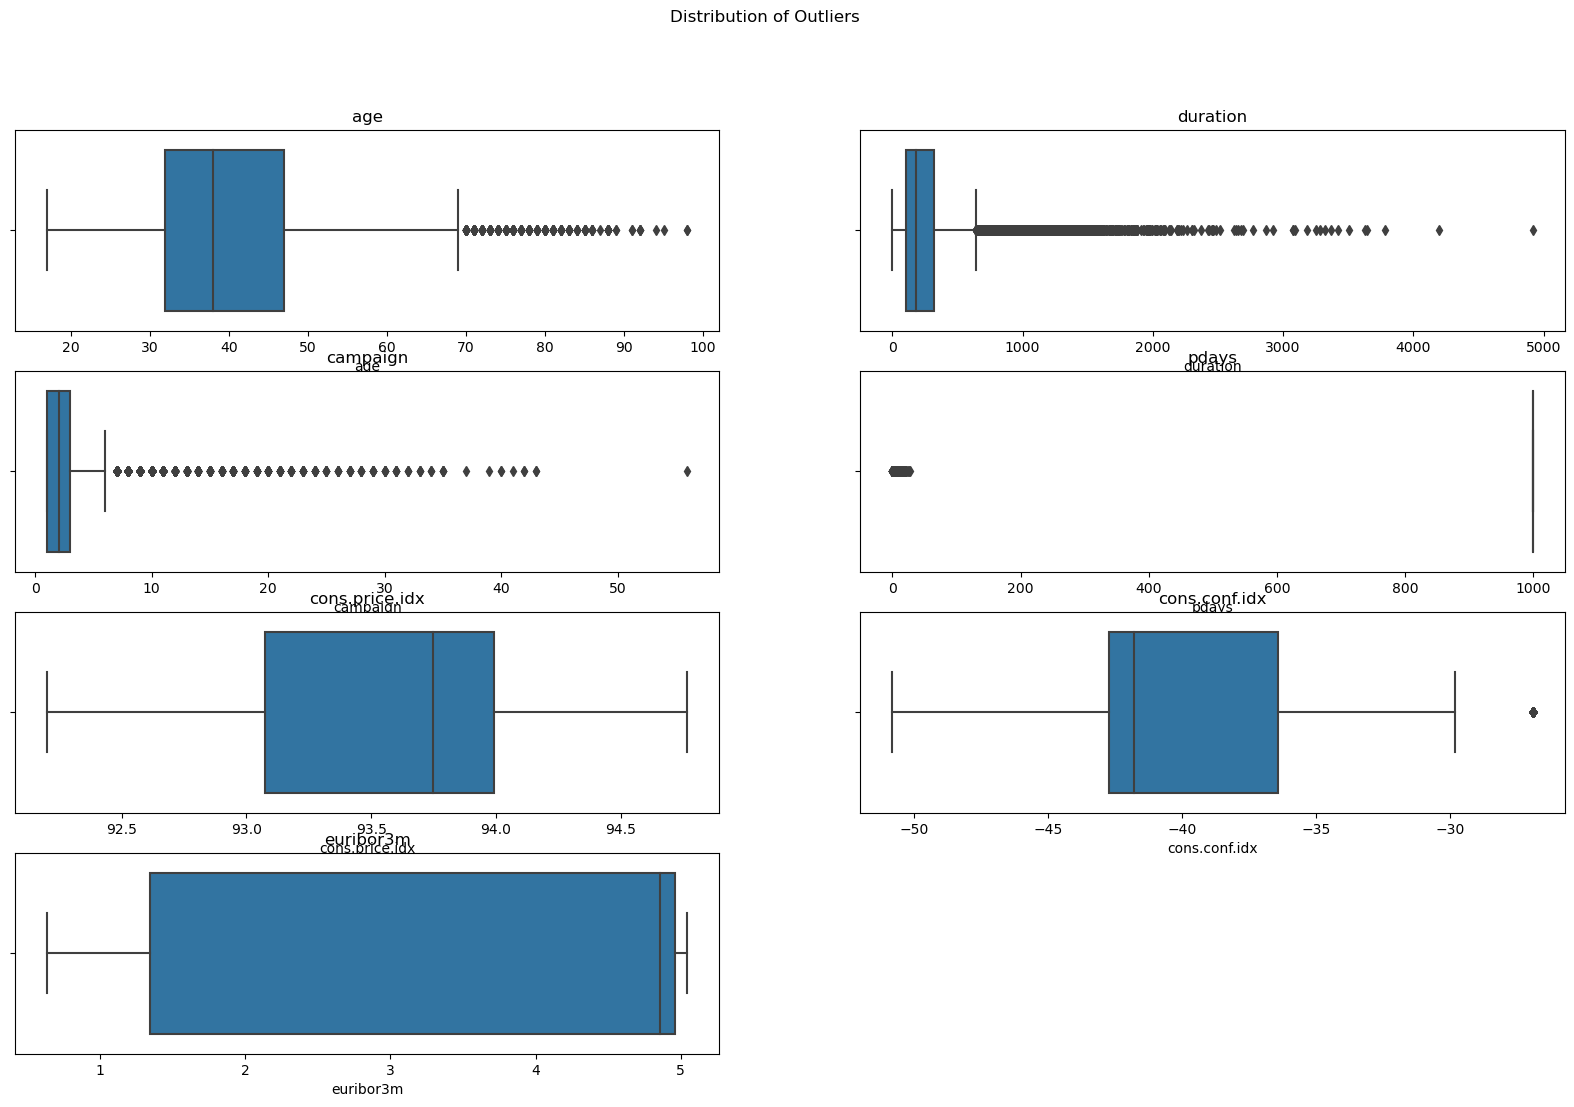

In [22]:
k=1
plt.figure(figsize=(20,12))
plt.suptitle("Distribution of Outliers")

for i in df.loc[:,num_list]:
    plt.subplot(4,2,k)
    sns.boxplot(x = i, data = df.loc[:,num_list])
    plt.title(i)
    k+=1

#### let's remove outliers for age and duration, other variables don't make much sense

In [23]:
out_list=["age","duration"]
for i in df.loc[:,out_list]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    df.loc[df[i] > up_lim,i] = up_lim
    df.loc[df[i] < low_lim,i] = low_lim

#### Understanding Categorical features

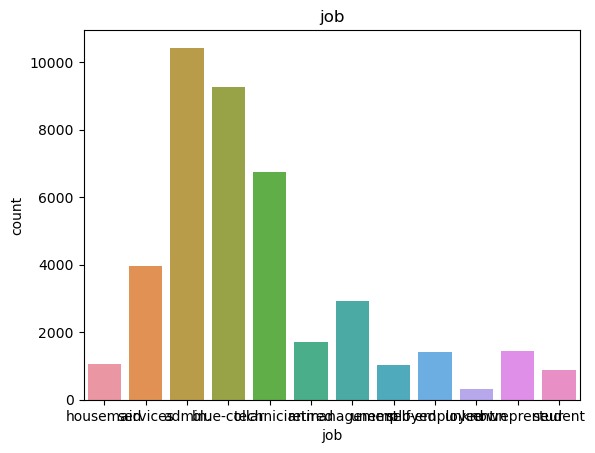

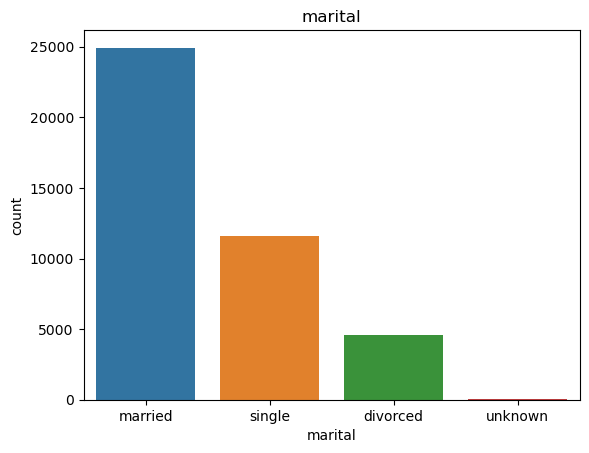

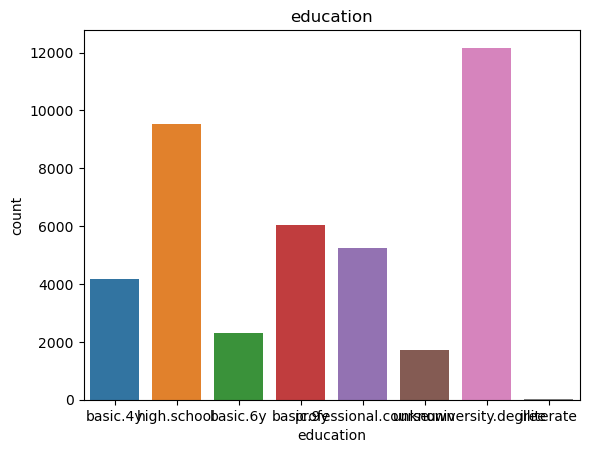

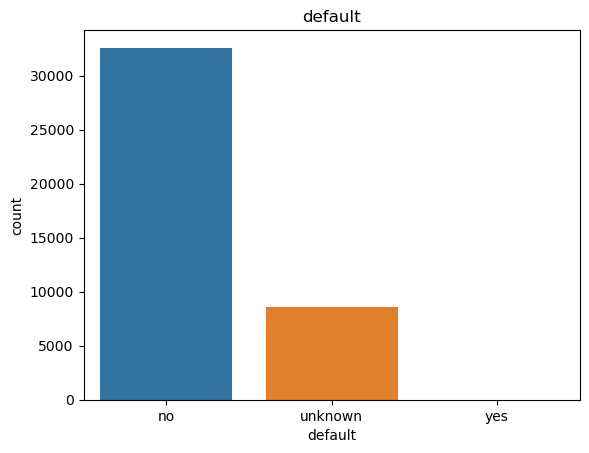

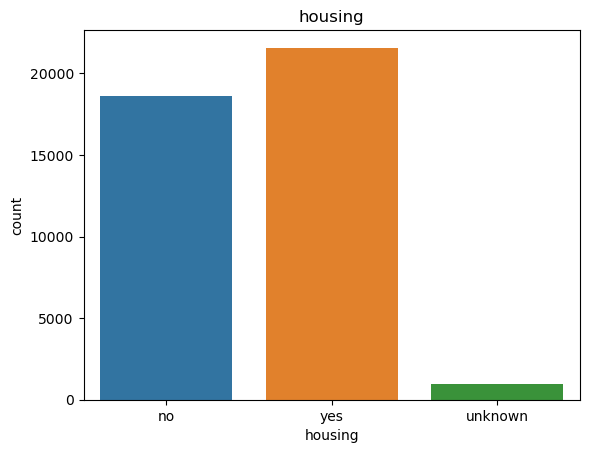

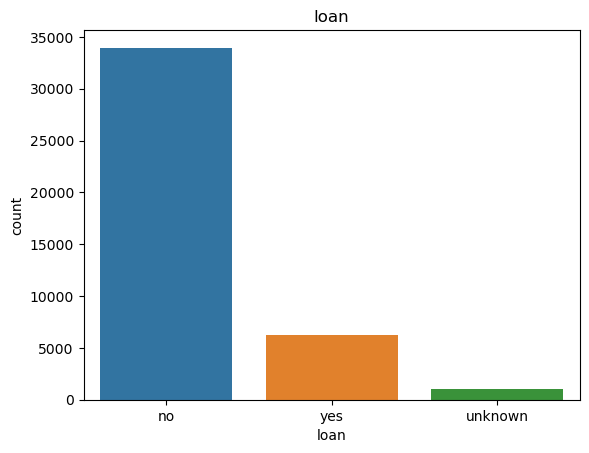

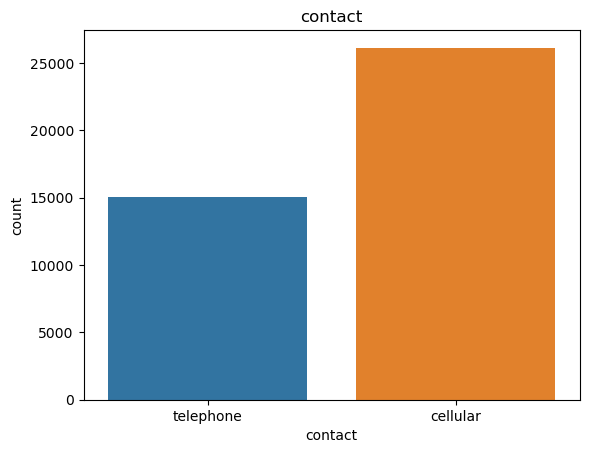

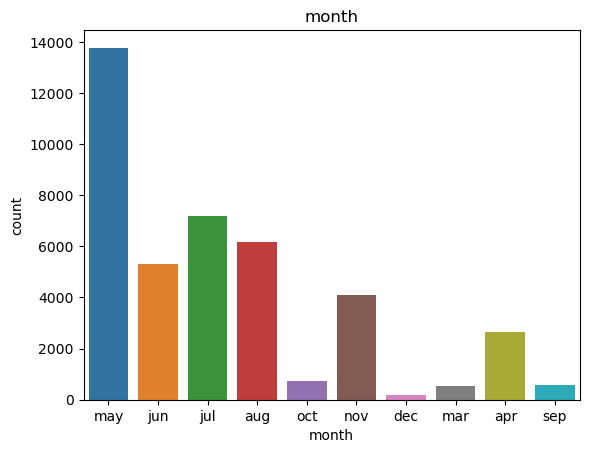

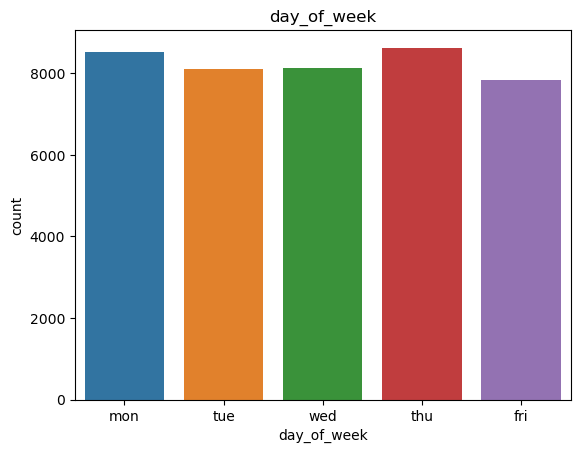

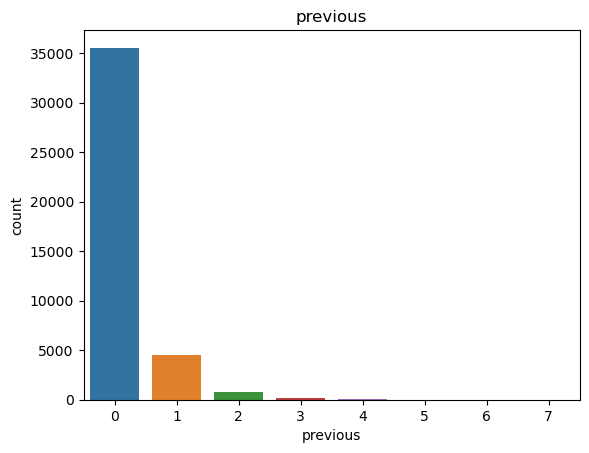

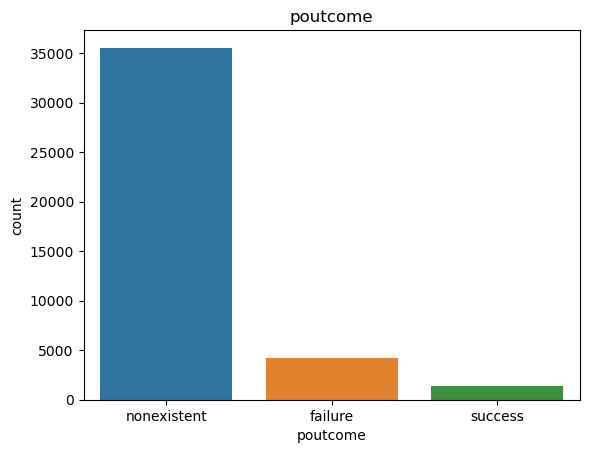

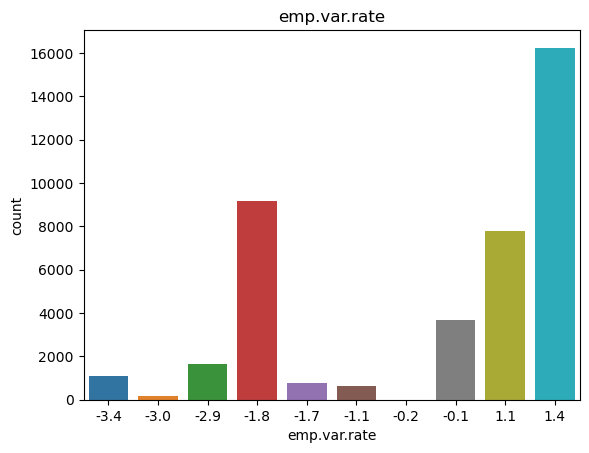

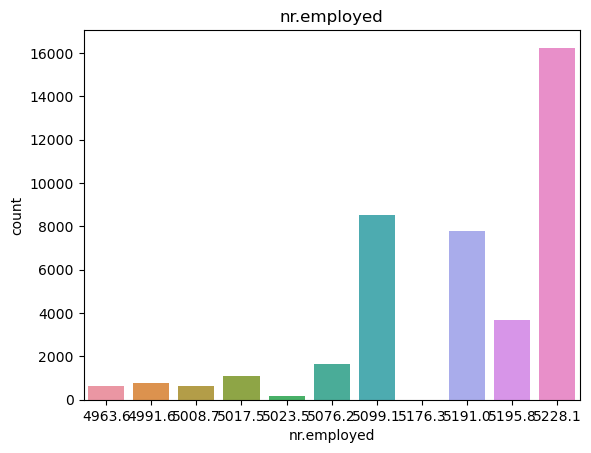

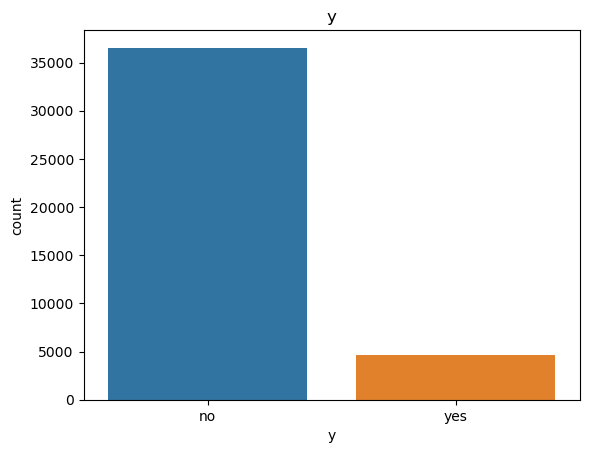

In [24]:
for i in cat_list:
    plt.figure()
    sns.countplot(x = i, data = df.loc[:,cat_list])
    plt.title(i)

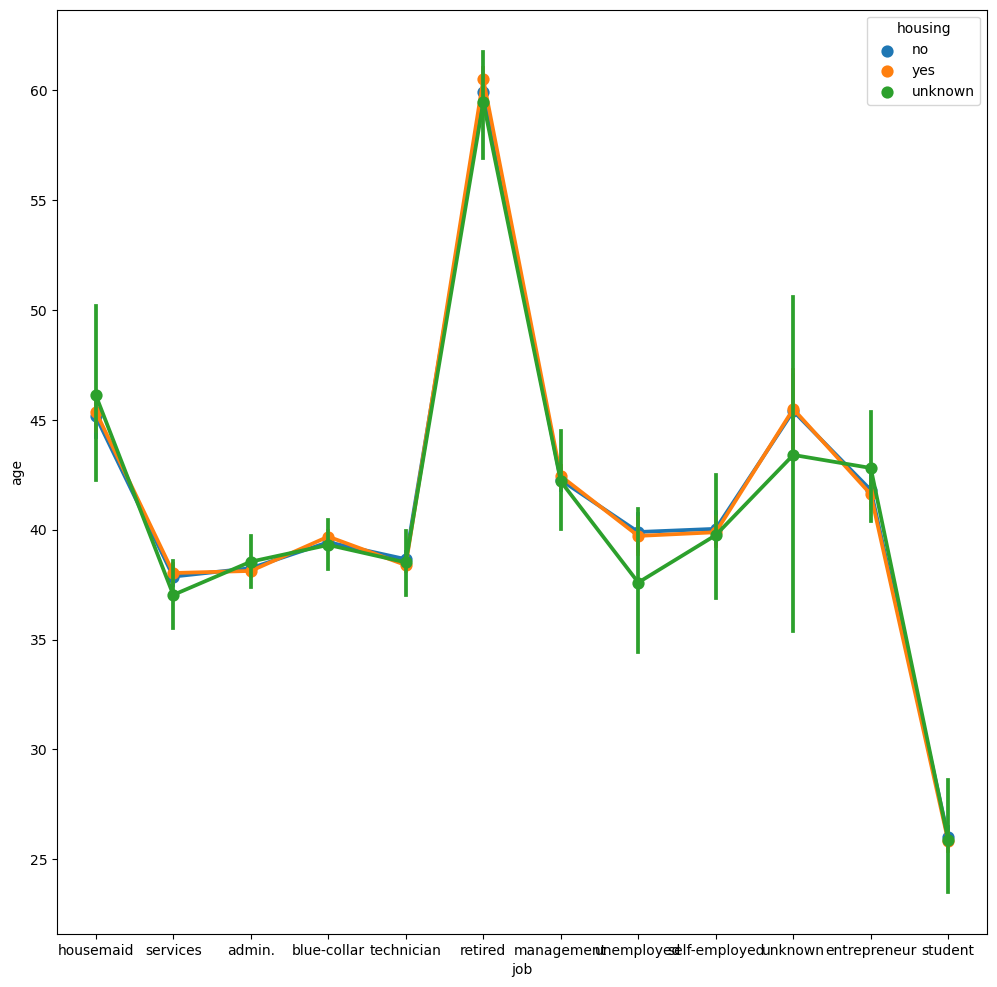

In [25]:
plt.figure(figsize=(12,12))

sns.pointplot(x ='job',y ='age', data = df,hue="housing");

#### Transforming categorical data for model fitting

In [26]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [27]:
df_new = df.apply(lambda x: object_to_int(x))
df_new.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


#### Checking for correlations

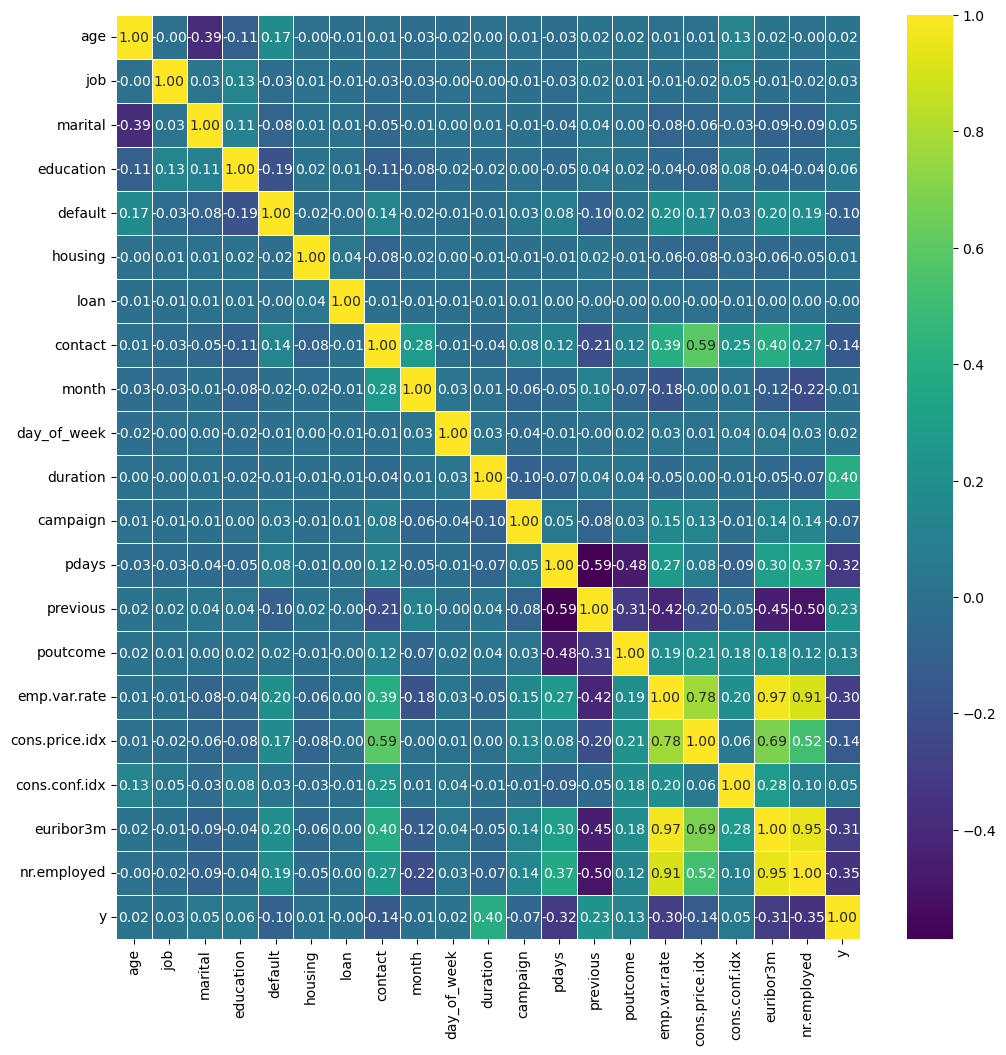

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(df_new.corr(),annot=True,linewidths=0.6,fmt=".2f",cmap="viridis")
plt.show()

### Distributing data into Features and results set and then splitting it to testing and training sets

In [29]:
X = df_new.drop(columns = ['y'])
y = df_new['y'].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [31]:
scaler= StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Fitting different models and comparing their performances

### KNN

In [32]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
t0 = time.time()
knn_model.fit(X_train,y_train)
knn_time = time.time()-t0
print("Training time KNN:", knn_time)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)
print(classification_report(y_test, predicted_y))

Training time KNN: 0.003000020980834961
KNN accuracy: 0.9014323865015781
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10965
           1       0.62      0.32      0.42      1392

    accuracy                           0.90     12357
   macro avg       0.77      0.65      0.68     12357
weighted avg       0.89      0.90      0.89     12357



### SVM

In [34]:
svc_model = SVC(random_state = 1)

t0 = time.time()
svc_model.fit(X_train,y_train)
svm_time = time.time()- t0
print("Training time SVM:", svm_time)

predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)
print(classification_report(y_test, predict_y))

Training time SVM: 13.688136100769043
SVM accuracy is : 0.9056405276361577
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10965
           1       0.69      0.30      0.42      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.64      0.68     12357
weighted avg       0.89      0.91      0.89     12357



### Logistic Regression

In [35]:
lr_model = LogisticRegression()
t0 = time.time()
lr_model.fit(X_train,y_train)
LR_time =  time.time()-t0
print("Training time Logistic Regression:", LR_time)

accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

Training time Logistic Regression: 0.14244556427001953
Logistic Regression accuracy is : 0.9079064497855467
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.66      0.38      0.48      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357



### Decision tree

In [36]:
dt_model = DecisionTreeClassifier()
t0 = time.time()
dt_model.fit(X_train,y_train)
DT_time = time.time()-t0
print("Training time Decision tree:", DT_time)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)
print(classification_report(y_test, predictdt_y))

Training time Decision tree: 0.25169992446899414
Decision Tree accuracy is : 0.8896172210083354
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10965
           1       0.51      0.51      0.51      1392

    accuracy                           0.89     12357
   macro avg       0.72      0.72      0.72     12357
weighted avg       0.89      0.89      0.89     12357



In [37]:
data = {"SMV_accuracy": [accuracy_svc], "LogisticReg_accuracy": [accuracy_lr], "DecisiionTr_accuracy": [accuracy_dt], "KNN_accuracy": [accuracy_knn]}
resultsdf = pd.DataFrame.from_dict(data)
resultsdf

,SMV_accuracy,LogisticReg_accuracy,DecisiionTr_accuracy,KNN_accuracy
0,0.905641,0.907906,0.889617,0.901432


Text(0, 0.5, 'Accuracy')

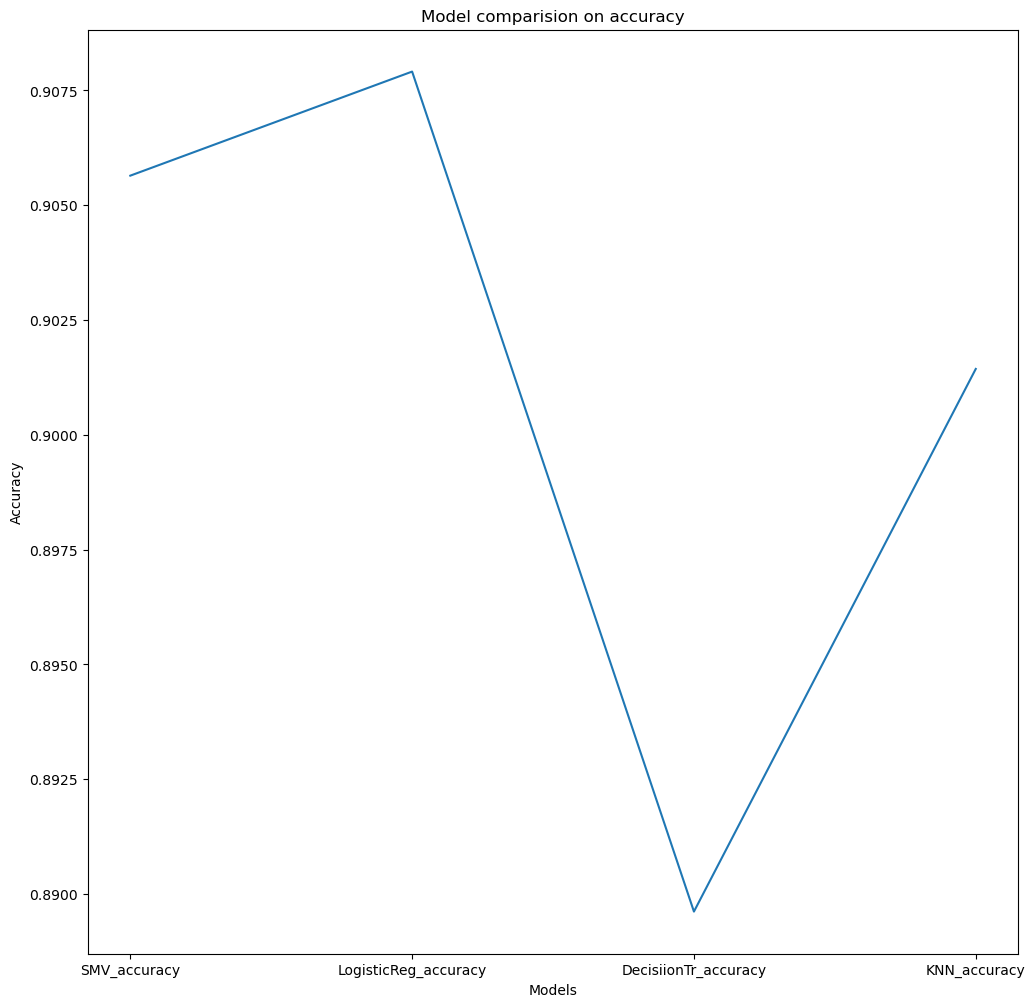

In [38]:
plt.figure(figsize=(12,12))
plt.plot(resultsdf.T)
plt.title("Model comparision on accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")

In [39]:
data = {"SMV_train_time": [svm_time], "LogisticReg_train_time": [LR_time], "DecisiionTr__train_time": [DT_time], "KNN_train_time": [knn_time]}
resultsdf = pd.DataFrame.from_dict(data)
resultsdf

,SMV_train_time,LogisticReg_train_time,DecisiionTr__train_time,KNN_train_time
0,13.688136,0.142446,0.2517,0.003


Text(0, 0.5, 'Training Time')

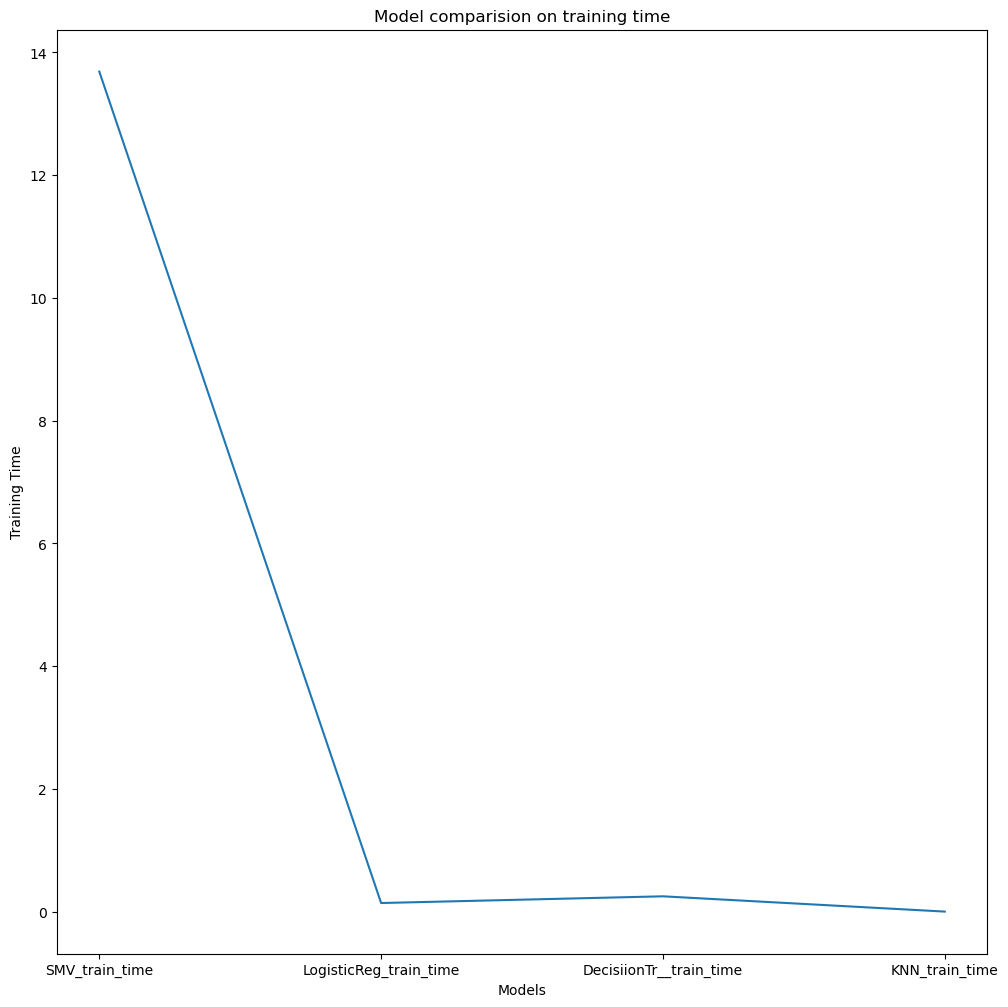

In [40]:
plt.figure(figsize=(12,12))
plt.plot(resultsdf.T)
plt.title("Model comparision on training time")
plt.xlabel("Models")
plt.ylabel("Training Time")

## Conclusion:

## Comparing different models we can see that SVM gives a good accuracy over others but also the traning time taken in the most out of 4 models. 
## On other hand KNN model takes the lowest time to train the model but the accuracy is low.